# Linear regression example

Great explanations of Linear regression:
- https://scikit-learn.org/stable/modules/linear_model.html
- https://en.wikipedia.org/wiki/Ordinary_least_squares#Matrix/vector_formulation

From sklearn docs: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

# Import libs

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Load data, features, training/testing sets

In [91]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use just one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split into testing/training set
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes_X, diabetes_y, test_size=0.33)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")

X_train.shape: (296, 1)
X_test.shape: (146, 1)


# Train the model and measure test results

In [92]:
# Create the linear regression object
model = linear_model.LinearRegression()

print(X_train.shape)
print(y_train.shape)
model.fit(X_train, y_train)

# Make a prediction vector using the test set
y_pred = model.predict(X_test)

# The variance of the residual is not the same as the MSE.
residual = (y_test - y_pred)

# Coefficients
print("Coefficients:")
print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")
# Coeff. of determination -- 1 is a perfect prediction. This is Sini's "variance explained", R^2.
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
# Explained variance score -- 1 - (the variance of the residual) / (the variane of the response)
# The closer to 1.0, the better the score
print(f"Explained variance score: {explained_variance_score(y_test, y_pred)}")

(296, 1)
(296,)
Coefficients:
Mean square error: 4152.538733157039
Coefficient of determination: 0.26016132279179105
Explained variance score: 0.2608838024453508


# Plot the results

## Model

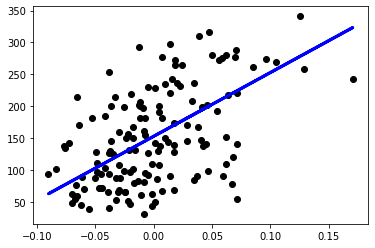

In [93]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

## Residual

<AxesSubplot:ylabel='Count'>

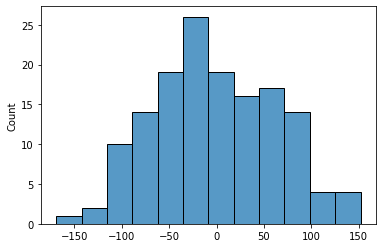

In [94]:
# Plot residual
# It's normally distributed!
sns.histplot(data=residual, bins=12)

## Exponential response

(200, 1)
(200, 1)
Coefficients:
Mean square error: 4152.538733157039
Coefficient of determination: 0.26016132279179105
Explained variance score: 0.2608838024453508


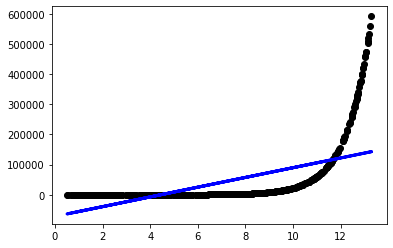

<AxesSubplot:ylabel='Count'>

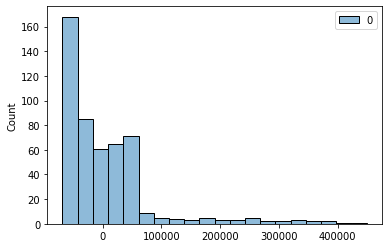

In [102]:
X_test = np.random.uniform(low=0.5, high=13.3, size=(500,1))
X_train = np.random.uniform(low=0.5, high=13.3, size=(200,1))

y_exp_train = np.exp(X_train)
y_exp_test = np.exp(X_test)

# Create the linear regression object
model = linear_model.LinearRegression()

print(X_train.shape)
print(y_exp_train.shape)
model.fit(X_train, y_exp_train)

# Make a prediction vector using the test set
y_exp_pred = model.predict(X_test)

# The variance of the residual is not the same as the MSE.
residual = (y_exp_test - y_exp_pred)

# Coefficients
print("Coefficients:")
print(f"Mean square error: {mean_squared_error(y_test, y_pred)}")
# Coeff. of determination -- 1 is a perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
# Explained variance score -- 1 - (the variance of the residual) / (the variane of the response)
# The closer to 1.0, the better the score
print(f"Explained variance score: {explained_variance_score(y_test, y_pred)}")

# Plot outputs
plt.scatter(X_test, y_exp_test, color="black")
plt.plot(X_test, y_exp_pred, color="blue", linewidth=3)

plt.xticks()
plt.yticks()

plt.show()

sns.histplot(data=residual, bins=20)